In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
#feature & target
X=df.drop("quality", axis=1)
y=df["quality"]

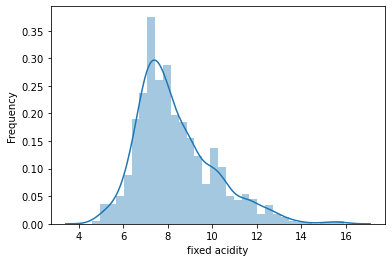

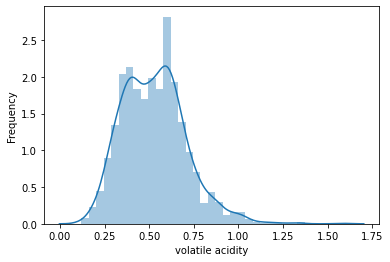

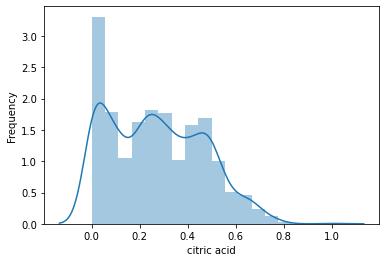

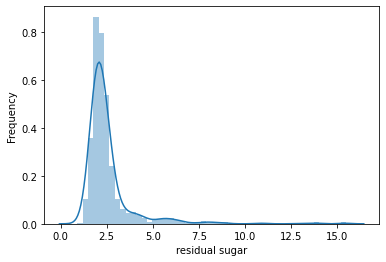

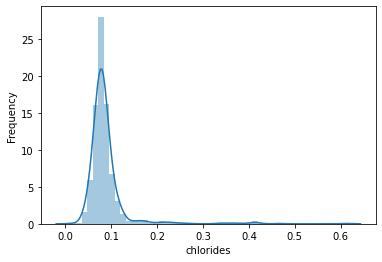

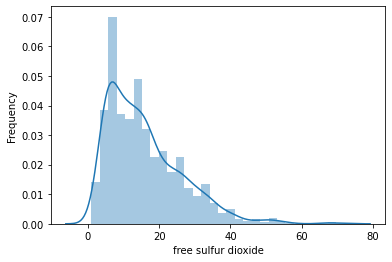

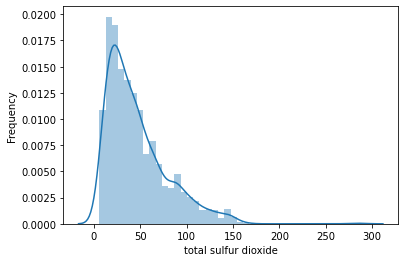

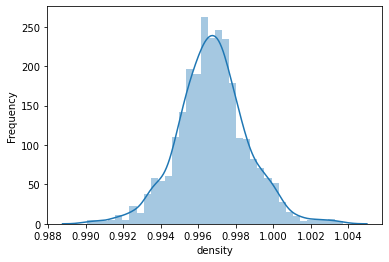

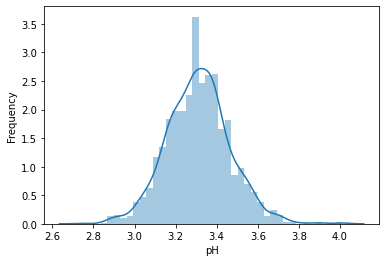

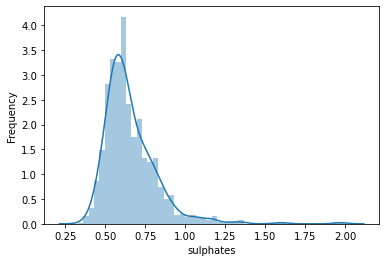

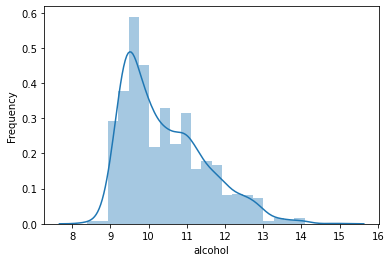

In [9]:
for col in X:
    plt.figure()
    sns.distplot(X[col])
    plt.ylabel("Frequency")
    plt.show()

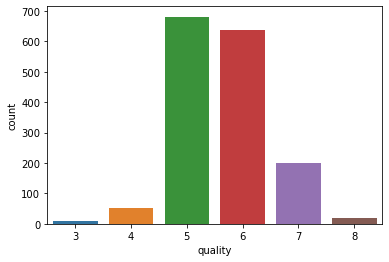

In [10]:
# target count
plt.figure()
sns.countplot(y)
plt.show()

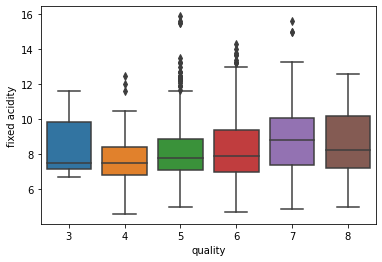

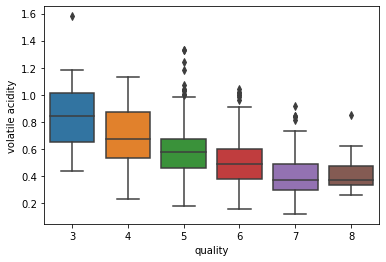

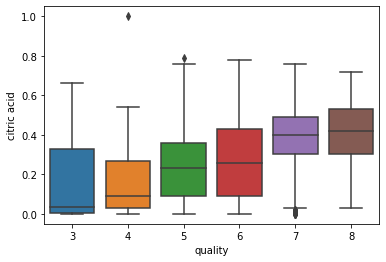

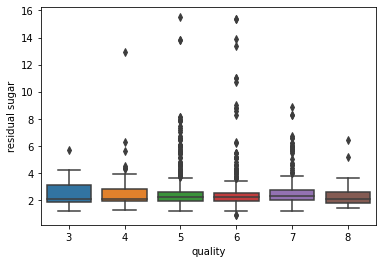

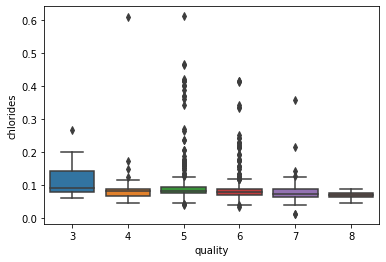

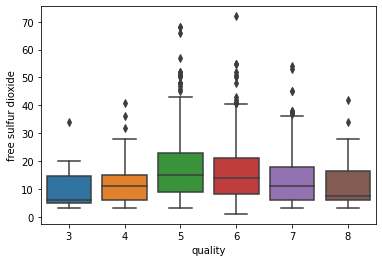

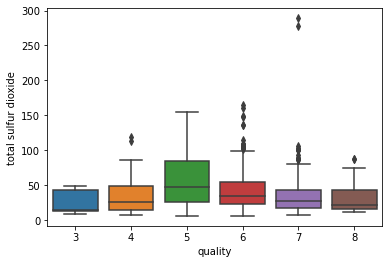

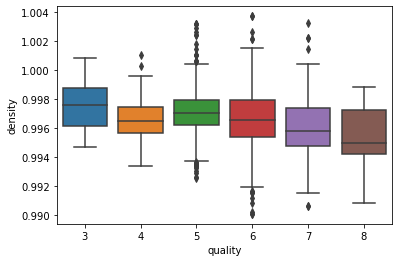

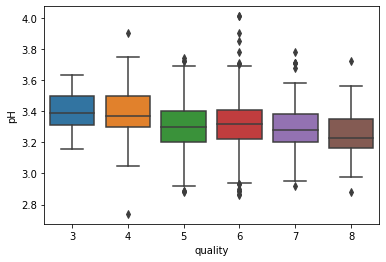

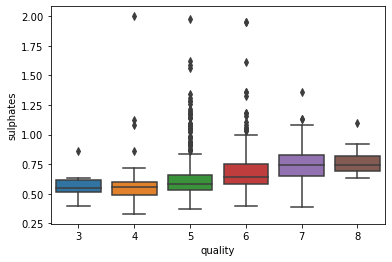

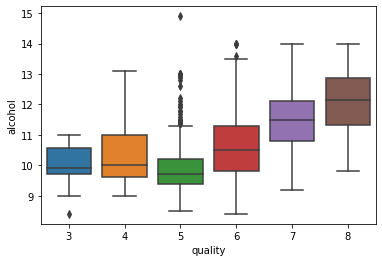

In [11]:
# feature target relationship and outliers
for col in X:
    plt.figure()
    sns.boxplot(data=df, x="quality", y=col)
    plt.show()

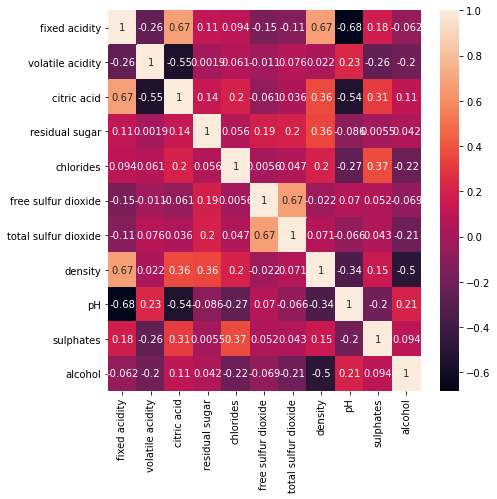

In [12]:
# multi-colinearity
plt.figure(figsize=(7,7))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [13]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [14]:
# model
# gini index
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
# train score
model.score(X_train,y_train)

1.0

In [16]:
# predict
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.14      0.14      0.14        21
           5       0.66      0.69      0.67       207
           6       0.66      0.57      0.61       195
           7       0.47      0.60      0.53        52
           8       0.33      0.33      0.33         3

    accuracy                           0.60       480
   macro avg       0.38      0.39      0.38       480
weighted avg       0.61      0.60      0.61       480



In [17]:
# entropy

model2 = DecisionTreeClassifier(criterion="entropy")
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
# predict
y_pred = model2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.12      0.05      0.07        21
           5       0.71      0.72      0.72       207
           6       0.56      0.54      0.55       195
           7       0.33      0.44      0.38        52
           8       0.25      0.33      0.29         3

    accuracy                           0.59       480
   macro avg       0.33      0.35      0.33       480
weighted avg       0.58      0.59      0.58       480



In [19]:
# depth
model.get_depth()

21

In [20]:
# prunning
# max depth

model3 = DecisionTreeClassifier(max_depth=8)
model3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [21]:
# predict
y_pred = model3.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.20      0.05      0.08        21
           5       0.62      0.75      0.68       207
           6       0.63      0.57      0.60       195
           7       0.51      0.44      0.47        52
           8       0.00      0.00      0.00         3

    accuracy                           0.61       480
   macro avg       0.33      0.30      0.31       480
weighted avg       0.59      0.61      0.59       480



In [22]:
# min samples leaf
model4 = DecisionTreeClassifier(min_samples_leaf=3)
model4.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=3)

In [23]:
# predict
y_pred = model4.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.15      0.10      0.12        21
           5       0.63      0.69      0.66       207
           6       0.58      0.55      0.57       195
           7       0.52      0.54      0.53        52
           8       0.00      0.00      0.00         3

    accuracy                           0.58       480
   macro avg       0.31      0.31      0.31       480
weighted avg       0.57      0.58      0.58       480



In [24]:
#Random over sampling
from imblearn.over_sampling import RandomOverSampler

In [25]:
rs = RandomOverSampler(random_state=1)
X_train_rs, y_train_rs = rs.fit_resample(X_train,y_train)

In [26]:
y_train_rs.value_counts()

4    474
6    474
8    474
3    474
5    474
7    474
Name: quality, dtype: int64

In [27]:
model5 = DecisionTreeClassifier()
model5.fit(X_train_rs, y_train_rs)

DecisionTreeClassifier()

In [28]:
y_pred = model5.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.10      0.14        21
           5       0.68      0.73      0.71       207
           6       0.60      0.57      0.59       195
           7       0.45      0.44      0.45        52
           8       0.14      0.33      0.20         3

    accuracy                           0.60       480
   macro avg       0.35      0.36      0.35       480
weighted avg       0.60      0.60      0.60       480



In [29]:
model5.get_depth()

19

In [30]:
# max_depth
model6 = DecisionTreeClassifier(max_depth=15)
model6.fit(X_train_rs,y_train_rs)

DecisionTreeClassifier(max_depth=15)

In [31]:
y_pred = model6.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.29      0.19      0.23        21
           5       0.67      0.70      0.69       207
           6       0.60      0.59      0.60       195
           7       0.47      0.44      0.46        52
           8       0.17      0.33      0.22         3

    accuracy                           0.60       480
   macro avg       0.37      0.38      0.36       480
weighted avg       0.60      0.60      0.60       480



In [32]:
# min_samples_leaf
model7 = DecisionTreeClassifier(min_samples_leaf=3)
model7.fit(X_train_rs,y_train_rs)

DecisionTreeClassifier(min_samples_leaf=3)

In [33]:
y_pred = model7.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.31      0.24      0.27        21
           5       0.67      0.71      0.69       207
           6       0.60      0.53      0.57       195
           7       0.42      0.42      0.42        52
           8       0.09      0.33      0.14         3

    accuracy                           0.58       480
   macro avg       0.35      0.37      0.35       480
weighted avg       0.59      0.58      0.59       480



In [34]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(n_estimators=75, max_depth=18, max_features=8)
rf.fit(X_train_rs, y_train_rs)

RandomForestClassifier(max_depth=18, max_features=8, n_estimators=75)

In [36]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.14      0.22        21
           5       0.73      0.83      0.78       207
           6       0.71      0.61      0.65       195
           7       0.50      0.62      0.55        52
           8       0.14      0.33      0.20         3

    accuracy                           0.68       480
   macro avg       0.43      0.42      0.40       480
weighted avg       0.68      0.68      0.67       480



In [37]:
# converting multi-class to binary-class

df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
def multi_to_bin(n):
    if n >= 6:
        return 1
    else:
        return 0

In [39]:
df["quality_bin"] = df["quality"].apply(multi_to_bin)

In [40]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [41]:
df["quality_bin"].value_counts()

1    855
0    744
Name: quality_bin, dtype: int64

In [42]:
# feature and target split
X = df.drop(["quality_bin","quality"], axis=1)
y = df["quality_bin"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [44]:
rf = RandomForestClassifier(n_estimators=75)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=75)

In [45]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       230
           1       0.83      0.79      0.81       250

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480

